In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [18]:
img = cv2.imread("image.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

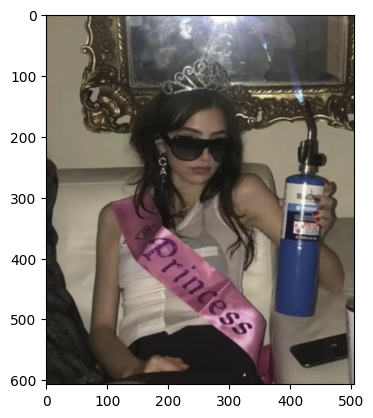

In [19]:
plt.imshow(img)

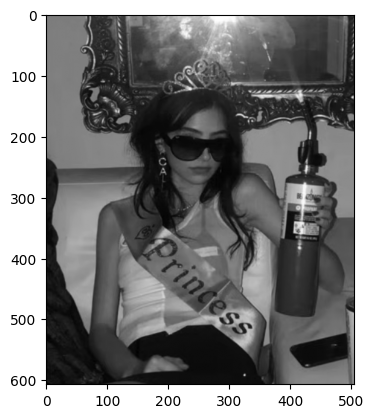

In [46]:
img_bnw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img_bnw, cmap="gray")
plt.show()

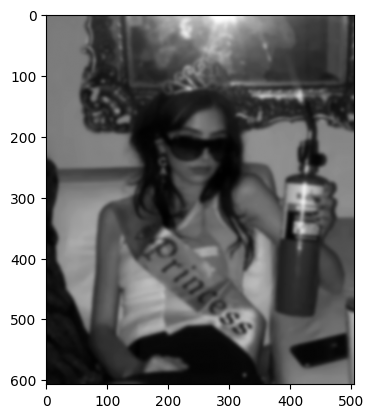

In [279]:
img_blur = cv2.GaussianBlur(img_bnw, (15, 15), 0)
plt.imshow(img_blur, cmap = "gray")
plt.show()

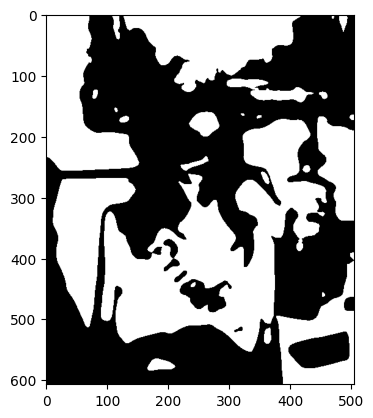

In [233]:
ret, thresh_otsu = cv2.threshold(img_blur, 120, 255, cv2.THRESH_OTSU)

plt.imshow(thresh_otsu, cmap = "gray")

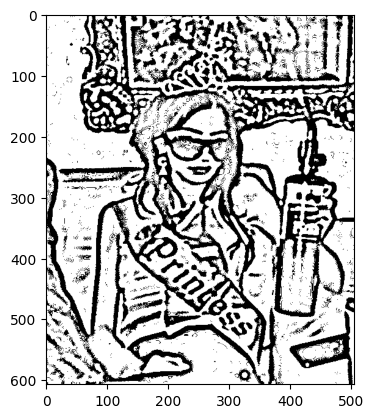

In [282]:
thresh_adaptive = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,11,1)

plt.imshow(thresh_adaptive, cmap = "gray")

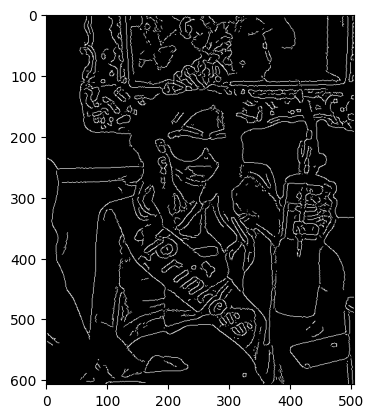

In [285]:
edges = cv2.Canny(img_blur,5, 30)
plt.imshow(edges, cmap = "gray")

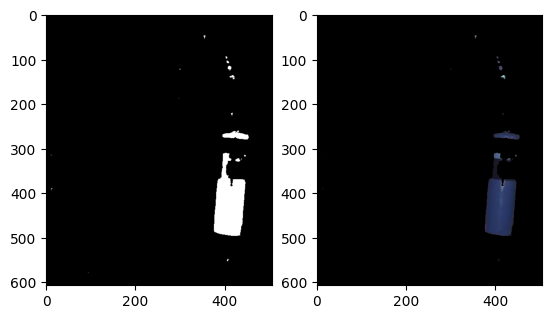

In [199]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

H_lower = 30
H_higher = 150
S_lower = 60
S_higher = 255
V_lower = 30
V_higher = 255

lower = np.array([H_lower, S_lower, V_lower])
higher = np.array([H_higher, S_higher, V_higher])

mask = cv2.inRange(img_hsv, lower, higher)

img_highlight = cv2.bitwise_and(img, img, mask = mask)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img_highlight)
plt.show()

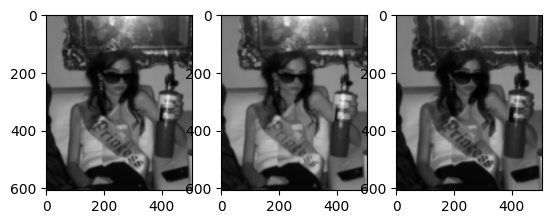

In [207]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img_blur,kernel,iterations = 1)
erosion = cv2.erode(img_blur,kernel,iterations = 1)


fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_blur, cmap='gray')
ax[1].imshow(dilation, cmap = "gray")
ax[2].imshow(erosion, cmap = "gray")
plt.show()

Keypoint 0 
Coordinate (324.3376770019531, 592.0574340820312) Size 20.36219024658203
Keypoint 1 
Coordinate (448.0037841796875, 553.2156372070312) Size 47.93757629394531
Keypoint 2 
Coordinate (316.85736083984375, 517.3473510742188) Size 20.72915267944336
Keypoint 3 
Coordinate (10.79198932647705, 487.5749206542969) Size 13.147798538208008
Keypoint 4 
Coordinate (240.99803161621094, 444.8592529296875) Size 26.2950496673584
Keypoint 5 
Coordinate (197.39561462402344, 386.1533203125) Size 18.330602645874023
Keypoint 6 
Coordinate (174.93283081054688, 380.2981872558594) Size 21.18734359741211
Keypoint 7 
Coordinate (4.163793087005615, 362.8074645996094) Size 14.053030967712402
Keypoint 8 
Coordinate (209.87179565429688, 337.9230651855469) Size 15.623050689697266
Keypoint 9 
Coordinate (317.23101806640625, 354.92803955078125) Size 29.716182708740234
Keypoint 10 
Coordinate (404.8326721191406, 412.00311279296875) Size 96.04348754882812
Keypoint 11 
Coordinate (160.90304565429688, 301.476562

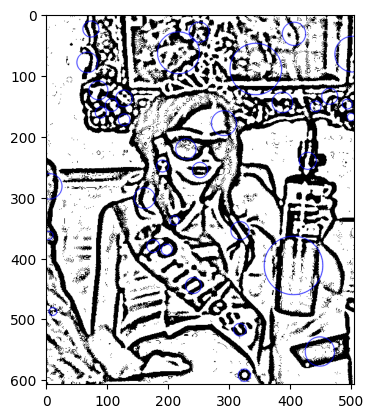

In [291]:
params = cv2.SimpleBlobDetector_Params()

image_to_blob = thresh_adaptive

params.filterByArea = True
params.minArea = 100
params.filterByColor = True
params.blobColor = 255
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(image_to_blob)
img_with_keypoints = cv2.drawKeypoints(image_to_blob, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_with_keypoints, cmap = "gray")
count = 0
for keypoint in keypoints:
    print(f"Keypoint {count} ")
    print(f"Coordinate {keypoint.pt} Size {keypoint.size}")
    count += 1